# Kümeleme (Clustering)

**Temel Kullanım Alanları**
* Müşteri Segmentasyonu
    * Collaboration Filtering
    * Özel Kampanyalar
    * Tehdit ve Sahtekarlık Yakalama
    * Eksik Verilerin Tamamlanması
    * Verinin Alt Kümesi Üzerinde Yapılan Bütün İşlemler
* Pazar Segmentasyonu
    * Davranışsal Segmentasyon
    * Demografik Segmentasyon
    * Psikolojik Segmentasyon
    * Coğrafi Segmentasyon
    * Verinin Alt Kümesi Üzerinde Yapılan Bütün İşlemler
* Sağlık ve Görüntü İşleme

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from warnings import filterwarnings
filterwarnings("ignore")

# K-Means (K-Ortalama)

* Nasıl Çlaışır?
    * Kaç küme olacağı kullanıcıdan parametre olarak seçilir
    * Rastgele olarak k merkez noktası seçilir
    * Her veri örneği en yakın merkez noktasına göre ilgili kümeye atanır
    * Her küme için yeni merkez noktaları hesaplanarak merkez noktaları kaydırılır
    * Yeni merkez noktalarına göre çalışır
    
<br>

## K-Means Başlangıç Noktası Tuzağı

**WCSS (within-cluster sums of squares)**

${\displaystyle WCSS = {\sum_{P_i in Cluster 1}} distance(p_i, C_1)^2 + {\sum_{P_i in Cluster 2}} distance(p_i, C_2)^2 + {\sum_{P_i in Cluster 3}} distance(p_i, C_3)^2}$

[[ 58643.47826087   5844.92753623]
 [104386.95652174   7289.13043478]
 [ 22069.41176471   5320.88235294]]


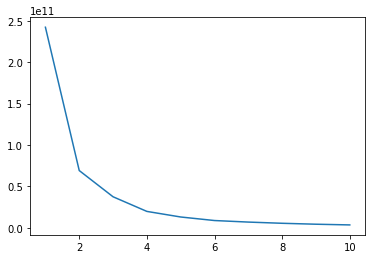

In [8]:
veriler = pd.read_csv("../Docs/musteriler.csv")
X = veriler.iloc[:,3:].values

kmeans = KMeans ( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)
sonuclar = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)

plt.plot(range(1,11),sonuclar);

In [9]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=10, random_state=123)
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, 

# Hiyerarşik Kümeleme (Hierarchical Clustering)

**Algoritma Adımları**
* Her veri tek bir küme/bölüt ile başlar
* En yakın ikişer komşuyu alıp ikişerli küme/bölüt oluşturulur
* En yakın iki kümeyi alıp yeni bir bölüt oluşturur
* Bir önceki adım, tek bir küme/bölüt olana kadar devam eder

<br>

**Mesafe Ölçümü**
* Metrik Problemi
    * Öklit Mesafesi
* Referanslar
    * En Yakın Noktalar
    * En Uzak Noktalar
    * Ortalama
    * Merkezler Arası Mesafe

[2 2 2 1 1 1 1 2 1 3 3 2 3 1 2 0 2 1 2 2 1 1 2 3 0 3 1 2 1 3 1 3 3 2 3 3 3
 1 3 0 0 1 2 1 1 3 3 3 3 0 1 2 0 0 2 2 1 2 3 2 0 2 3 1 3 1 3 2 3 1 2 2 2 2
 1 1 0 2 3 1 1 1 3 3 0 2 2 3 1 1 2 1 0 3 1 3 1 2 1 1 3 0 2 1 1 2 2 3 3 0 0
 2 2 2 2 3 1 2 3 3 1 3 2 2 2 3 1 1 0 1 1 3 3 3 3 1 3 3 2 3 2 1 3 3 2 3 3 3
 3 1 3 3 2 1 3 0 1 3 0 1 3 3 3 3 1 3 3 2 1 1 2 1 1 3 2 1 1 3 0 3 3 2 3 0 2
 0 1 1 3 1 3 1 3 2 1 2 2 3 3 3]


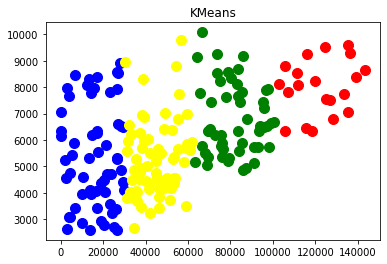

In [10]:
kmeans = KMeans (n_clusters = 4, init='k-means++', random_state= 123)
Y_tahmin= kmeans.fit_predict(X)
print(Y_tahmin)  
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('KMeans')
plt.show();

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


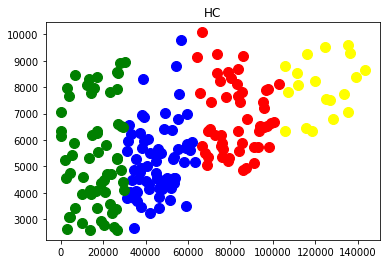

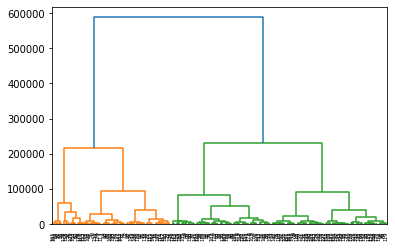

In [18]:
# Hiyerarşik Kümeleme

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('HC')
plt.show();


dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show();

In [19]:
?ac

Type:        AgglomerativeClustering
String form: AgglomerativeClustering(n_clusters=4)
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_agglomerative.py
Docstring:  
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

affinity : str or callable, default='euclidean'
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead of a similarity matrix)
    is needed as input for the fit method.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the output of the computa

# Özet

| **Model** | **Artıları** | **Eksileri** |
| --- | --- | --- |
| KMeans | Anlaşılması basittir, mesafe metrikleri üzerinden çalışır, küçük ve büyük veri setlerinde başarıyla uygulanabilir, verimli ve performanslıdır | Kaç bölüt/küme olacağına karar verilmesi gerekir |
| Hiyerarşik Kümeleme / Bölütleme | Farklı alternatiflerdeki küme/bölüt sayıları için hazır şekilde bekler, modelin kendisi en verimli küme/bölüt sayısına karar verebilir, dendrogram kullanılarak görselleştirilmesi mümkündür | Büyük veri kümeleri için uygun değildir |